In [1]:
import pandas as pd
from bs4 import BeautifulSoup

# Extraction Skills

In [2]:
data=pd.read_csv('data/kaggle/Resume Dataset/Resume/Resume.csv')

In [75]:
a = data['Resume_html'][17]

In [76]:
a

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME620245724" style="padding-top:0px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_620245724_1_403497878" style="padding-top:0px;"> <div class="name thinbottomborder" itemprop="name"> <span class="field" id="620245724FNAM1"> </span> <span> </span> <span class="field" id="620245724LNAM1"> HR DIRECTOR</span> </div> <div class="myGap"> </div> <div class="lowerborder thinbottomborder"> </div> </div> </div> <div class="section" id="SECTION_SUMM620245726" style="padding-top:0px;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMM620245726"> Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_620245726_1_403497890" style="padding-top:0px;"> <div class="field singlecolumn" id="620245726FRFM1"> Human Resource Professional\nConfident, Resourceful Human Resources professional, with academic background in h

In [77]:
def extract_skills(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    
    skills = []

    
    skill_sections = soup.find_all(class_='field singlecolumn')
    print()
    if skill_sections:
        
        skill_section = skill_sections[-1]
        
        skill_text = skill_section.get_text(strip=True)
        
        skills = [skill.strip() for skill in skill_text.split(',')]
    
    return skills


In [78]:
extract_skills(a)

['Accounting',
 'Advertising',
 'Analytical Skills',
 'agency',
 'Basic',
 'benefits',
 'benefits administration',
 'budget',
 'Business Communications',
 'Business Law',
 'Business Management',
 'Child Care',
 'clarify',
 'clerical',
 'Cold Calling',
 'Communication Skills',
 'Interpersonal Skills',
 'conferences',
 'Makes copies',
 'CPR',
 'database',
 'drafting',
 'editing',
 'Employee Relations',
 'faxes documents',
 'Finance',
 'Financial Accounting',
 'First Aid',
 'forms',
 'Government',
 'Hiring',
 'HRIS',
 'Human Resource Management',
 'Human Resource',
 'HR',
 'Human Resources Management',
 'image',
 'Information Systems',
 'International Business',
 'Job Analysis',
 'Kronos',
 'Labor Relations',
 'Leadership',
 'leadership development',
 'Law',
 'legal',
 'Managerial',
 'Managing',
 'Managerial Accounting',
 'Marketing',
 'meetings',
 'access',
 'Excel',
 'mail',
 'Microsoft Office',
 'Outlook',
 'PowerPoint',
 'Publisher',
 'Word',
 'Works',
 'Negotiations',
 'Networking',


In [37]:
data['Skills'] = data['Resume_html'].apply(extract_skills)


# Extraction Experience 

In [38]:

import re
from datetime import datetime



# Function to extract dates from a text string
def extract_dates(text):
    date_patterns = [
        r'\d{1,2}/\d{1,2}/\d{2,4}',
        r'\d{1,2}/\d{4}',
        r'(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)\s+\d{1,2},?\s+\d{4}',
        r'(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)\s+\d{4}'
    ]
    
    parsed_dates = []
    for pattern in date_patterns:
        dates = re.findall(pattern, text)
        for date in dates:
            for fmt in ('%m/%d/%Y', '%m/%Y', '%B %d, %Y', '%B %d %Y', '%b %d, %Y', '%b %d %Y', '%B %Y', '%b %Y'):
                try:
                    parsed_date = datetime.strptime(date, fmt)
                    parsed_dates.append(parsed_date)
                    break
                except ValueError:
                    pass
                
    return parsed_dates



# Function to find earliest and latest dates from a list of dates
def find_earliest_and_latest(dates):
    if not dates:
        return None, None, None
    earliest_date = min(dates)
    latest_date = max(dates)
    date_difference = (latest_date - earliest_date).days

    # Limit date_difference to a maximum of 3650 days
    if date_difference > 3650:
        date_difference = 3650

    #print(f"Earliest: {earliest_date}, Latest: {latest_date}, Difference: {date_difference}")
    return earliest_date, latest_date, date_difference




In [39]:
# Find earliest and latest dates in each row and add them as new columns
data['earliest_date'], data['latest_date'],data['date_difference'] = zip(*data['Resume_str'].apply(lambda x: find_earliest_and_latest(extract_dates(x))))



In [40]:
data['date_difference'].fillna(0, inplace=True)


In [43]:
data['Skill_count'] = data['Skills'].apply(len)


In [44]:
data.head()

,ID,Resume_str,Resume_html,Category,Skills,earliest_date,latest_date,date_difference,Skill_count
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[Accounting, ads, advertising, analytical skil...",1999-08-01 00:00:00,2013-12-01 00:00:00,3650.0,36
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,"[Adobe Photoshop, ADP, Asset Management, brand...",2009-09-01 00:00:00,2015-09-01 00:00:00,2191.0,40
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[Desktop Publishing, Newsletter productions, D...",1996-03-01 00:00:00,2016-09-01 00:00:00,3650.0,22
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[10-Key by touch, Type 50 wpm, filing, Access,...",2003-08-01 00:00:00,2008-10-01 00:00:00,1888.0,8
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[ADA, ADP, art, agency, benefits, Benefits Adm...",2001-01-01 00:00:00,2015-01-01 00:00:00,3650.0,76


In [91]:
zero_rows = data.loc[data['Skill_count'] == 0].index
print(f"Row indices with 0 skills: {list(zero_rows)}")


Row indices with 0 skills: []


In [53]:
data.iloc[178]

ID                                                          18460045
Resume_str                  FREELANCE GRAPHIC DESIGNER           ...
Resume_html        <div class="fontsize fontface vmargins hmargin...
Category                                                    DESIGNER
Skills                                                            []
earliest_date                                    1998-01-01 00:00:00
latest_date                                      2011-01-01 00:00:00
date_difference                                               3650.0
Skill_count                                                        0
Name: 178, dtype: object

In [80]:
mean_skill_count = data['Skill_count'].mean()
data['Skill_count'] = data['Skill_count'].replace(0, mean_skill_count)

In [81]:
data

,ID,Resume_str,Resume_html,Category,Skills,earliest_date,latest_date,date_difference,Skill_count
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[Accounting, ads, advertising, analytical skil...",1999-08-01 00:00:00,2013-12-01 00:00:00,3650.0,36.0
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,"[Adobe Photoshop, ADP, Asset Management, brand...",2009-09-01 00:00:00,2015-09-01 00:00:00,2191.0,40.0
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[Desktop Publishing, Newsletter productions, D...",1996-03-01 00:00:00,2016-09-01 00:00:00,3650.0,22.0
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[10-Key by touch, Type 50 wpm, filing, Access,...",2003-08-01 00:00:00,2008-10-01 00:00:00,1888.0,8.0
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[ADA, ADP, art, agency, benefits, Benefits Adm...",2001-01-01 00:00:00,2015-01-01 00:00:00,3650.0,76.0
...,...,...,...,...,...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,"[Dedication to customer service, often remaini...",2000-06-01 00:00:00,2015-05-01 00:00:00,3650.0,3.0
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION,[Non-Profit and Community Support Neighborhood...,1995-07-01 00:00:00,2014-01-01 00:00:00,3650.0,5.0
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,"[Active Directory, Hardware, Customer Service,...",2005-01-01 00:00:00,2016-10-01 00:00:00,3650.0,17.0
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,[HOBBIES AND VOLUNTEER SERVICES Enjoy playing ...,2009-03-01 00:00:00,2009-03-01 00:00:00,0.0,7.0


In [92]:
replace_skills = [
    "Accounts_Receivable",
    "Auditing",
    "Brand_Management",
    "Budgeting",
    "Cash_Management",
    "Client_Relations",
    "Conflict_Resolution",
    "Content_Creation",
    "Contract_Negotiation",
    "Cost_Analysis",
    "Creative_Writing",
    "Critical_Thinking",
    "CRM",
    "Data_Analysis",
    "Decision_Making",
    "Document_Management",
    "E-commerce",
    "Employee_Engagement",
    "Event_Planning",
    "Facility_Management",
    "Graphic_Design",
    "Health_and_Safety",
    "Inventory_Control",
    "Investment_Strategies",
    "IT_Support",
    "Marketing_Strategy",
    "Multitasking",
    "Office_Administration",
    "Office_Management",
    "Operations_Management",
    "Organizational_Change",
    "Personal_Branding",
    "Presentation_Skills",
    "Product_Development",
    "Product_Management",
    "Project_Management",
    "Proofreading_and_Editing",
    "Public_Relations",
    "Quality_Control",
    "Risk_Assessment",
    "Risk_Management",
    "Sales",
    "Search_Engine_Optimization",
    "Security",
    "Social_Media_Management",
    "Software_Development",
    "Strategic_Planning",
    "Supply_Chain_Management",
    "Team_Building",
    "Teamwork",
    "Technical_Writing",
    "Time_Management",
    "Training_and_Development",
    "Travel_Arrangements",
    "Vendor_Management",
    "Visual_Communication",
    "Web_Design",
    "Web_Development",
    "Workflow_Management",
    "Administrative_Support",
    "Adobe_Creative_Suite",
    "Agile_Methodologies",
    "Analytical_Thinking",
    "Appointment_Setting",
    "Artificial_Intelligence",
    "Audio_Editing",
    "Augmented_Reality",
    "Biotechnology",
    "Brand_Development",
    "Business_Analytics",
    "Business_Intelligence",
    "Change_Management",
    "Claims_Processing",
    "Clean_Energy",
    "Climate_Science",
    "Cloud_Computing",
    "Coding",
    "Construction_Management",
    "Content_Strategy",
    "Crisis_Management",
    "Crowdfunding",
    "Customer_Retention",
    "Data_Migration",
    "Data_Visualization",
    "Delegation",
    "Design_Thinking",
    "Digital_Advertising",
    "Digital_Marketing",
    "Disaster_Recovery",
    "E-learning",
    "Economic_Analysis",
    "Email_Marketing",
    "Energy_Efficiency",
    "Environmental_Science",
    "Ethics",
    "Event_Coordination",
    "Facilitation",
    "Fashion_Design",
    "Food_Safety",
    "Fundraising",
    "Grant_Writing",
    "Green_Building",
    "Healthcare_Administration",
    "Home_Automation",
    "Industrial_Design",
    "Influencer_Marketing",
    "Information_Architecture",
    "Instructional_Design",
    "Intellectual_Property",
    "Intercultural_Communication",
    "International_Trade",
    "IoT",
    "IT_Architecture",
    "Language_Teaching",
    "Lean_Manufacturing",
    "Logistics",
    "Machine_Learning",
    "Manufacturing_Processes",
    "Market_Research",
    "Mentoring",
    "Mobile_App_Development",
    "Molecular_Biology",
    "Nanotechnology",
    "Online_Advertising",
    "Operations_Research",
    "Pharmaceutical_Industry",
    "Physical_Security",
    "Privacy",
    "Process_Improvement",
    "Product_Design",
    "Program_Evaluation",
    "Public_Speaking",
    "Quality_Assurance",
    "Renewable_Energy",
    "Robotics",
    "Salesforce",
    "Scientific_Research",
    "Search_Engine_Marketing",
    "Smart_Cities",
    "Social_Media_Strategy",
    "Sustainable_Design",
    "Systems_Thinking",
    "Tax_Planning",
    "Technical_Support",
    "Telecommunications",
    "Test_Automation",
    "Thermal_Engineering",
    "Translation_Services",
    "Urban_Planning",
    "User_Experience_Design",
    "User_Interface_Design",
    "Video_Production",
    "Virtual_Reality",
    "Voice_Technology",
    "Water_Resources",
    "Web_Analytics",
    "3D_Printing",
]

In [93]:
def count_same_skills(skills1, skills2):
    same_skills = set(skills1).intersection(set(skills2))
    return len(same_skills)

In [94]:
data['same_skills_num'] = data['Skills'].apply(lambda skills: count_same_skills(skills, replace_skills))

In [95]:
data

,ID,Resume_str,Resume_html,Category,Skills,earliest_date,latest_date,date_difference,Skill_count,same_skills_num
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[Accounting, ads, advertising, analytical skil...",1999-08-01 00:00:00,2013-12-01 00:00:00,3650.0,36.0,0
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,"[Adobe Photoshop, ADP, Asset Management, brand...",2009-09-01 00:00:00,2015-09-01 00:00:00,2191.0,40.0,0
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[Desktop Publishing, Newsletter productions, D...",1996-03-01 00:00:00,2016-09-01 00:00:00,3650.0,22.0,0
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[10-Key by touch, Type 50 wpm, filing, Access,...",2003-08-01 00:00:00,2008-10-01 00:00:00,1888.0,8.0,0
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[ADA, ADP, art, agency, benefits, Benefits Adm...",2001-01-01 00:00:00,2015-01-01 00:00:00,3650.0,76.0,0
...,...,...,...,...,...,...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,"[Dedication to customer service, often remaini...",2000-06-01 00:00:00,2015-05-01 00:00:00,3650.0,3.0,0
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION,[Non-Profit and Community Support Neighborhood...,1995-07-01 00:00:00,2014-01-01 00:00:00,3650.0,5.0,0
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,"[Active Directory, Hardware, Customer Service,...",2005-01-01 00:00:00,2016-10-01 00:00:00,3650.0,17.0,0
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,[HOBBIES AND VOLUNTEER SERVICES Enjoy playing ...,2009-03-01 00:00:00,2009-03-01 00:00:00,0.0,7.0,0


In [96]:
nonzero_rows = data.loc[data['same_skills_num'] != 0].index
print(f"Row indices with 0 skills: {list(nonzero_rows)}")

Row indices with 0 skills: [21, 36, 92, 94, 98, 102, 107, 117, 134, 135, 149, 159, 213, 227, 230, 231, 236, 239, 245, 262, 271, 280, 286, 287, 288, 290, 294, 301, 318, 319, 324, 331, 332, 335, 365, 368, 383, 411, 440, 450, 458, 465, 474, 487, 494, 497, 510, 514, 521, 529, 542, 547, 553, 555, 558, 559, 563, 566, 570, 571, 579, 580, 581, 582, 583, 584, 592, 595, 599, 600, 603, 605, 606, 607, 611, 616, 622, 625, 632, 633, 634, 636, 637, 638, 640, 641, 643, 646, 648, 652, 658, 660, 666, 667, 668, 682, 701, 714, 723, 726, 728, 742, 744, 748, 749, 750, 752, 760, 776, 781, 786, 787, 802, 803, 821, 834, 838, 839, 863, 865, 871, 877, 891, 892, 900, 911, 912, 943, 965, 972, 975, 976, 987, 989, 993, 1007, 1011, 1012, 1016, 1025, 1027, 1040, 1041, 1060, 1064, 1068, 1070, 1071, 1072, 1075, 1076, 1096, 1103, 1104, 1116, 1119, 1124, 1127, 1146, 1149, 1151, 1152, 1153, 1155, 1169, 1170, 1171, 1172, 1174, 1187, 1188, 1198, 1220, 1232, 1233, 1234, 1243, 1244, 1251, 1254, 1259, 1280, 1290, 1292, 1304, 13

In [97]:
data['skill_diff'] = data['Skill_count'] - data['same_skills_num']

In [98]:
data

,ID,Resume_str,Resume_html,Category,Skills,earliest_date,latest_date,date_difference,Skill_count,same_skills_num,skill_diff
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[Accounting, ads, advertising, analytical skil...",1999-08-01 00:00:00,2013-12-01 00:00:00,3650.0,36.0,0,36.0
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,"[Adobe Photoshop, ADP, Asset Management, brand...",2009-09-01 00:00:00,2015-09-01 00:00:00,2191.0,40.0,0,40.0
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[Desktop Publishing, Newsletter productions, D...",1996-03-01 00:00:00,2016-09-01 00:00:00,3650.0,22.0,0,22.0
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[10-Key by touch, Type 50 wpm, filing, Access,...",2003-08-01 00:00:00,2008-10-01 00:00:00,1888.0,8.0,0,8.0
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[ADA, ADP, art, agency, benefits, Benefits Adm...",2001-01-01 00:00:00,2015-01-01 00:00:00,3650.0,76.0,0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,"[Dedication to customer service, often remaini...",2000-06-01 00:00:00,2015-05-01 00:00:00,3650.0,3.0,0,3.0
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION,[Non-Profit and Community Support Neighborhood...,1995-07-01 00:00:00,2014-01-01 00:00:00,3650.0,5.0,0,5.0
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,"[Active Directory, Hardware, Customer Service,...",2005-01-01 00:00:00,2016-10-01 00:00:00,3650.0,17.0,0,17.0
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,[HOBBIES AND VOLUNTEER SERVICES Enjoy playing ...,2009-03-01 00:00:00,2009-03-01 00:00:00,0.0,7.0,0,7.0


In [99]:
mean_skill_diff = data['skill_diff'].mean()
mean_skill_diff

20.872852925389182

# Save Data

In [100]:
data.to_csv('Ultimate_Data_No_label.csv', index=False)

In [15]:
data['date_difference']

0       3650.0
1       2191.0
2       3650.0
3       1888.0
4       3650.0
         ...  
2479    3650.0
2480    3650.0
2481    3650.0
2482       0.0
2483    3650.0
Name: date_difference, Length: 2484, dtype: float64

In [101]:
data['skill_diff']

0       36.0
1       40.0
2       22.0
3        8.0
4       76.0
        ... 
2479     3.0
2480     5.0
2481    17.0
2482     7.0
2483    43.0
Name: skill_diff, Length: 2484, dtype: float64

In [16]:
top5_max_rows = data.nlargest(50, 'date_difference')
print(top5_max_rows.index, top5_max_rows)


Int64Index([ 0,  2,  4,  5,  6,  8,  9, 10, 11, 12, 13, 15, 17, 18, 22, 24, 26,
            27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 42, 46, 50, 52, 53, 54, 55,
            56, 57, 58, 64, 67, 68, 73, 77, 82, 83, 84, 86, 87, 89, 91, 92],
           dtype='int64')           ID                                         Resume_str  \
0   16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
2   33176873           HR DIRECTOR       Summary      Over 2...   
4   17812897           HR MANAGER         Skill Highlights  ...   
5   11592605           HR GENERALIST       Summary     Dedic...   
6   25824789           HR MANAGER       Summary    HUMAN RES...   
8   11847784           HR SPECIALIST       Summary    Posses...   
9   32896934           HR CLERK       Summary    Translates ...   
10  29149998           HR ASSISTANT       Summary    Highly ...   
11  11480899           HR MANAGER         Summary      Human...   
12  23155093           HR MANAGER         Summary    To obta...   


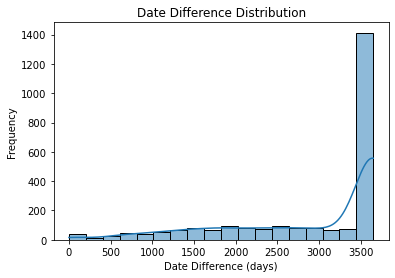

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the date_difference values
sns.histplot(data=data, x='date_difference', kde=True)

# Set title and labels
plt.title('Date Difference Distribution')
plt.xlabel('Date Difference (days)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

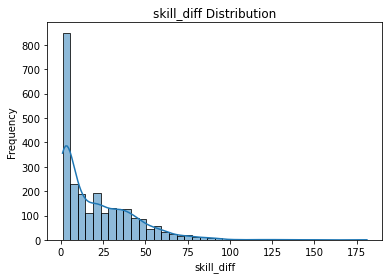

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the date_difference values
sns.histplot(data=data, x='skill_diff', kde=True)

# Set title and labels
plt.title('skill_diff Distribution')
plt.xlabel('skill_diff')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Generate Label

In [126]:
#three class
def categorize_date_difference(date_difference,skill_diff):
    if date_difference <= 1095 and skill_diff <= 10:
        return 'high'
    elif date_difference <= 1095 and 10<=skill_diff <= 20:
        return 'high'
    elif date_difference <= 1095 and skill_diff >= 20:
        return 'mid'
    elif 1095 <= date_difference <= 2920 and skill_diff <= 10:
        return 'high'
    elif 1095 <= date_difference < 2920 and 10<=skill_diff <= 20:
        return 'mid'
    elif 1095 <= date_difference <= 2920 and skill_diff >= 20:
        return 'low'
    elif date_difference >= 2920 and skill_diff <= 10:
        return 'mid'
    elif date_difference >= 2920 and 10<skill_diff <= 20:
        return 'low'
    elif date_difference >= 2920 and skill_diff >= 20:
        return 'low'
    else:
        return 'mid'

In [127]:
data['label_three'] = data.apply(lambda row: categorize_date_difference(row['date_difference'], row['skill_diff']), axis=1)


In [128]:
#nine class
def categorize_date_difference_nine(date_difference,skill_diff):
    if date_difference <= 1095 and skill_diff <= 10:
        return 'You need more work experience and skills'
    elif date_difference <= 1095 and 10<=skill_diff <= 20:
        return 'You need more work experience and few more skills'
    elif date_difference <= 1095 and skill_diff >= 20:
        return 'You need more work experience'
    elif 1095 <= date_difference <= 2920 and skill_diff <= 10:
        return 'You need few more work experience and more skills'
    elif 1095 <= date_difference <= 2920 and 10<=skill_diff <= 20:
        return 'You need few more work experience and skills'
    elif 1095 <= date_difference <= 2920 and skill_diff >= 20:
        return 'You need few more work experience'
    elif date_difference >= 2920 and skill_diff <= 10:
        return 'You need more skills'
    elif date_difference >= 2920 and 10<=skill_diff <= 20:
        return 'You need few more skills'
    elif date_difference >= 2920 and skill_diff >= 20:
        return 'You will not be replaced'
    else:
        return 'error'

In [129]:
data['label_nine'] = data.apply(lambda row: categorize_date_difference_nine(row['date_difference'], row['skill_diff']), axis=1)


In [130]:
data['label_nine'] 

0                                You will not be replaced
1                       You need few more work experience
2                                You will not be replaced
3       You need few more work experience and more skills
4                                You will not be replaced
                              ...                        
2479                                 You need more skills
2480                                 You need more skills
2481                             You need few more skills
2482             You need more work experience and skills
2483                             You will not be replaced
Name: label_nine, Length: 2484, dtype: object

In [131]:
error = data.loc[data['label_nine'] == 'error'].index
print(f"Row indices with 0 skills: {list(error)}")

Row indices with 0 skills: []


In [132]:
data

,ID,Resume_str,Resume_html,Category,Skills,earliest_date,latest_date,date_difference,Skill_count,same_skills_num,skill_diff,label,label_three,label_nine
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[Accounting, ads, advertising, analytical skil...",1999-08-01 00:00:00,2013-12-01 00:00:00,3650.0,36.0,0,36.0,low,low,You will not be replaced
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,"[Adobe Photoshop, ADP, Asset Management, brand...",2009-09-01 00:00:00,2015-09-01 00:00:00,2191.0,40.0,0,40.0,low,low,You need few more work experience
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[Desktop Publishing, Newsletter productions, D...",1996-03-01 00:00:00,2016-09-01 00:00:00,3650.0,22.0,0,22.0,low,low,You will not be replaced
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[10-Key by touch, Type 50 wpm, filing, Access,...",2003-08-01 00:00:00,2008-10-01 00:00:00,1888.0,8.0,0,8.0,high,high,You need few more work experience and more skills
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[ADA, ADP, art, agency, benefits, Benefits Adm...",2001-01-01 00:00:00,2015-01-01 00:00:00,3650.0,76.0,0,76.0,low,low,You will not be replaced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,"[Dedication to customer service, often remaini...",2000-06-01 00:00:00,2015-05-01 00:00:00,3650.0,3.0,0,3.0,mid,mid,You need more skills
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION,[Non-Profit and Community Support Neighborhood...,1995-07-01 00:00:00,2014-01-01 00:00:00,3650.0,5.0,0,5.0,mid,mid,You need more skills
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,"[Active Directory, Hardware, Customer Service,...",2005-01-01 00:00:00,2016-10-01 00:00:00,3650.0,17.0,0,17.0,low,low,You need few more skills
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,[HOBBIES AND VOLUNTEER SERVICES Enjoy playing ...,2009-03-01 00:00:00,2009-03-01 00:00:00,0.0,7.0,0,7.0,high,high,You need more work experience and skills


In [133]:
new_data_three_label = data[['Resume_str', 'label_three']]

In [134]:
new_data_nine_label = data[['Resume_str', 'label_nine']]

In [135]:
new_data_three_label.to_csv('new_data_three_label.csv', index=False)

In [136]:
new_data_nine_label.to_csv('new_data_nine_label.csv', index=False)

# Modeling

In [137]:
max_length = new_data_three_label['Resume_str'].apply(len).max()

# Print the maximum length
print(f"Maximum length of strings in 'Resume_str' column: {max_length}")


Maximum length of strings in 'Resume_str' column: 38842


In [138]:
import tensorflow as tf
from sklearn import preprocessing
import numpy as np

In [162]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(new_data_three_label["Resume_str"])
new_data_three_label["numeral_Resume_str"] = tokenizer.texts_to_sequences(new_data_three_label["Resume_str"])
numeral_Description_pad = tf.keras.preprocessing.sequence.pad_sequences(new_data_three_label["numeral_Resume_str"], padding='post', truncating= 'post', maxlen= 39000)




/var/folders/f7/m1rd6hwn6tnf22_zbv46ywg80000gn/T/ipykernel_2612/1611513626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_three_label["numeral_Resume_str"] = tokenizer.texts_to_sequences(new_data_three_label["Resume_str"])


In [163]:
new_data_three_label['numeral_Resume_str'][0]

[200,
 802,
 34,
 232,
 200,
 802,
 117,
 909,
 19,
 24,
 32,
 7,
 730,
 125,
 3,
 28,
 5,
 1722,
 1,
 19,
 24,
 12,
 4579,
 2879,
 1,
 429,
 3,
 19,
 596,
 304,
 8860,
 2,
 11322,
 8,
 1923,
 1601,
 2120,
 2,
 19,
 24,
 284,
 596,
 14,
 19,
 336,
 25,
 12,
 34,
 2297,
 1044,
 486,
 438,
 27,
 1,
 26,
 670,
 345,
 2298,
 59,
 123,
 246,
 264,
 3613,
 3960,
 378,
 27,
 523,
 256,
 22,
 12324,
 5,
 19,
 1879,
 1,
 34,
 22,
 3789,
 6150,
 2724,
 142,
 32,
 27,
 523,
 1497,
 968,
 6,
 499,
 316,
 1722,
 48,
 133,
 15,
 6150,
 15669,
 13729,
 8861,
 6462,
 25155,
 8861,
 4885,
 47,
 15670,
 25156,
 297,
 902,
 1,
 1372,
 5,
 19,
 24,
 17,
 220,
 96,
 119,
 995,
 1441,
 118,
 80,
 12,
 89,
 1,
 84,
 779,
 28,
 200,
 802,
 34,
 232,
 200,
 802,
 1397,
 78,
 2,
 72,
 11,
 13,
 21,
 10,
 9,
 4730,
 2,
 167,
 127,
 4804,
 1,
 2591,
 107,
 133,
 15,
 756,
 855,
 806,
 123,
 351,
 27,
 1,
 112,
 67,
 1981,
 112,
 5350,
 3314,
 1,
 236,
 206,
 5724,
 201,
 3,
 351,
 136,
 1696,
 133,
 15,
 293,
 1,

In [164]:
le= preprocessing.LabelEncoder()
le.fit(new_data_three_label["label_three"])
numeral_labels = np.array(le.transform(new_data_three_label["label_three"]))

In [165]:
numeral_labels.shape

(2484,)

In [166]:
numeral_Description_pad.shape

(2484, 39000)

In [167]:
idxs = np.random.permutation(np.arange(len(numeral_Description_pad)))
train_size = int(0.9*len(idxs)) +1
train_numeral_Description_pad, valid_numeral_Description_pad = numeral_Description_pad[0:train_size], numeral_Description_pad[train_size:]
train_numeral_labels, valid_numeral_labels = numeral_labels[0:train_size], numeral_labels[train_size:]
tf_train_set = tf.data.Dataset.from_tensor_slices((train_numeral_Description_pad, train_numeral_labels))
tf_valid_set = tf.data.Dataset.from_tensor_slices((valid_numeral_Description_pad, valid_numeral_labels))





In [168]:
tf_valid_set

<TensorSliceDataset shapes: ((39000,), ()), types: (tf.int32, tf.int64)>

In [169]:
word2idx = tokenizer.word_index
word2idx = {k:v for k,v in word2idx.items()}
idx2word = {v:k for k,v in word2idx.items()}
vocab_size = len(word2idx)
embed_size= 128
state_size=16
str_classes= le.classes_
num_classes= len(str_classes)

In [170]:
str_classes

array(['high', 'low', 'mid'], dtype=object)

In [171]:
x = tf.keras.layers.Input(shape=[None])
h = tf.keras.layers.Embedding(vocab_size +1, embed_size)(x)
h1 = tf.keras.layers.Conv1D(filters=state_size,padding='same',activation='relu',kernel_size=3)(h)
h2 = tf.keras.layers.Conv1D(filters=state_size,padding='same',activation='relu',kernel_size=5)(h)
h3 = tf.keras.layers.Conv1D(filters=state_size,padding='same',activation='relu',kernel_size=7)(h)
h1 = tf.keras.layers.GlobalMaxPool1D()(h1)
h2 = tf.keras.layers.GlobalMaxPool1D()(h2)
h3 = tf.keras.layers.GlobalMaxPool1D()(h3)
h = tf.concat([h1, h2, h3], axis=1)
h = tf.keras.layers.Dense(num_classes, activation='softmax')(h)
model = tf.keras.Model(inputs=x, outputs=h) 

In [172]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])



In [173]:
model.fit(train_numeral_Description_pad, train_numeral_labels, validation_data=(valid_numeral_Description_pad,valid_numeral_labels), epochs=10)




Epoch 1/10
70/70 [==============================] - 209s 3s/step - loss: 1.0445 - accuracy: 0.4486 - val_loss: 1.0525 - val_accuracy: 0.4234
Epoch 2/10
70/70 [==============================] - 211s 3s/step - loss: 0.8968 - accuracy: 0.5796 - val_loss: 1.0301 - val_accuracy: 0.4516
Epoch 3/10
70/70 [==============================] - 212s 3s/step - loss: 0.6927 - accuracy: 0.7822 - val_loss: 0.9850 - val_accuracy: 0.4798
Epoch 4/10
70/70 [==============================] - 212s 3s/step - loss: 0.4328 - accuracy: 0.9445 - val_loss: 0.9583 - val_accuracy: 0.5000
Epoch 5/10
70/70 [==============================] - 212s 3s/step - loss: 0.2149 - accuracy: 0.9893 - val_loss: 0.9546 - val_accuracy: 0.5121
Epoch 6/10
70/70 [==============================] - 211s 3s/step - loss: 0.0954 - accuracy: 0.9991 - val_loss: 0.9698 - val_accuracy: 0.5000
Epoch 7/10
70/70 [==============================] - 212s 3s/step - loss: 0.0471 - accuracy: 0.9996 - val_loss: 0.9862 - val_accuracy: 0.5121
Epoch 8/10
70

In [174]:
def save_model(model, model_dir):
    model.save(model_dir)

model_dir = 'three_class_model'
save_model(model, model_dir)

INFO:tensorflow:Assets written to: three_class_model/assets


In [155]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(new_data_nine_label["Resume_str"])
new_data_nine_label["numeral_Resume_str"] = tokenizer.texts_to_sequences(new_data_nine_label["Resume_str"])
numeral_Description_pad = tf.keras.preprocessing.sequence.pad_sequences(new_data_nine_label["numeral_Resume_str"], padding='post', truncating= 'post', maxlen= 39000)
le= preprocessing.LabelEncoder()
le.fit(new_data_nine_label["label_nine"])
numeral_labels = np.array(le.transform(new_data_nine_label["label_nine"]))

idxs = np.random.permutation(np.arange(len(numeral_Description_pad)))
train_size = int(0.9*len(idxs)) +1
train_numeral_Description_pad, valid_numeral_Description_pad = numeral_Description_pad[0:train_size], numeral_Description_pad[train_size:]
train_numeral_labels, valid_numeral_labels = numeral_labels[0:train_size], numeral_labels[train_size:]
tf_train_set = tf.data.Dataset.from_tensor_slices((train_numeral_Description_pad, train_numeral_labels))
tf_valid_set = tf.data.Dataset.from_tensor_slices((valid_numeral_Description_pad, valid_numeral_labels))

word2idx = tokenizer.word_index
word2idx = {k:v for k,v in word2idx.items()}
idx2word = {v:k for k,v in word2idx.items()}
vocab_size = len(word2idx)
embed_size= 128
state_size=16
str_classes= le.classes_
num_classes= len(str_classes)





/var/folders/f7/m1rd6hwn6tnf22_zbv46ywg80000gn/T/ipykernel_2612/936642018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_nine_label["numeral_Resume_str"] = tokenizer.texts_to_sequences(new_data_nine_label["Resume_str"])


In [156]:
str_classes

array(['You need few more skills', 'You need few more work experience',
       'You need few more work experience and more skills',
       'You need few more work experience and skills',
       'You need more skills', 'You need more work experience',
       'You need more work experience and few more skills',
       'You need more work experience and skills',
       'You will not be replaced'], dtype=object)

In [157]:
x = tf.keras.layers.Input(shape=[None])
h = tf.keras.layers.Embedding(vocab_size +1, embed_size)(x)
h1 = tf.keras.layers.Conv1D(filters=state_size,padding='same',activation='relu',kernel_size=3)(h)
h2 = tf.keras.layers.Conv1D(filters=state_size,padding='same',activation='relu',kernel_size=5)(h)
h3 = tf.keras.layers.Conv1D(filters=state_size,padding='same',activation='relu',kernel_size=7)(h)
h1 = tf.keras.layers.GlobalMaxPool1D()(h1)
h2 = tf.keras.layers.GlobalMaxPool1D()(h2)
h3 = tf.keras.layers.GlobalMaxPool1D()(h3)
h = tf.concat([h1, h2, h3], axis=1)
h = tf.keras.layers.Dense(num_classes, activation='softmax')(h)
model = tf.keras.Model(inputs=x, outputs=h) 

In [158]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])



In [159]:
model.fit(train_numeral_Description_pad, train_numeral_labels, validation_data=(valid_numeral_Description_pad,valid_numeral_labels), epochs=10)




Epoch 1/10
70/70 [==============================] - 212s 3s/step - loss: 1.8773 - accuracy: 0.2858 - val_loss: 1.8006 - val_accuracy: 0.2823
Epoch 2/10
70/70 [==============================] - 214s 3s/step - loss: 1.6223 - accuracy: 0.4262 - val_loss: 1.7118 - val_accuracy: 0.3911
Epoch 3/10
70/70 [==============================] - 216s 3s/step - loss: 1.3948 - accuracy: 0.5778 - val_loss: 1.6070 - val_accuracy: 0.4476
Epoch 4/10
70/70 [==============================] - 215s 3s/step - loss: 1.0891 - accuracy: 0.6945 - val_loss: 1.5174 - val_accuracy: 0.4516
Epoch 5/10
70/70 [==============================] - 232s 3s/step - loss: 0.7362 - accuracy: 0.8309 - val_loss: 1.4494 - val_accuracy: 0.4677
Epoch 6/10
70/70 [==============================] - 224s 3s/step - loss: 0.4240 - accuracy: 0.9392 - val_loss: 1.4177 - val_accuracy: 0.5000
Epoch 7/10
70/70 [==============================] - 218s 3s/step - loss: 0.2193 - accuracy: 0.9857 - val_loss: 1.4241 - val_accuracy: 0.4798
Epoch 8/10
70

In [160]:
def save_model(model, model_dir):
    model.save(model_dir)

In [161]:
model_dir1 = 'nine_class_model'
save_model(model, model_dir1)

2023-04-27 01:59:47.130854: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: nine_class_model/assets
